In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('seaborn-darkgrid')
%matplotlib inline
import datetime


In [269]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from time import time


In [270]:
train = pd.read_csv('../ECG_dataset/train.csv', names = [i for i in range(141)])
validation = pd.read_csv('../ECG_dataset/validation.csv', names = [i for i in range(141)])
trainval = pd.read_csv('../ECG_dataset/trainval.csv', names = [i for i in range(141)])
test = pd.read_csv('../ECG_dataset/test.csv', names = [i for i in range(141)])



In [271]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.59727,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.23859,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.30260,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.22301,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930


In [272]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 1.2 MB


In [273]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 198.4 KB


In [274]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,...,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000
mean,0.417206,-0.049589,-0.049565,-0.041618,-0.039423,-0.034732,-0.031624,-0.029979,-0.019378,-0.016818,...,0.020021,-0.000316,-0.018205,-0.034214,-0.042929,-0.031204,-0.043146,-0.036833,-0.043571,-0.037740
std,0.493326,1.040721,1.011609,1.031965,1.039541,1.030359,1.005031,0.997371,1.000226,1.008524,...,0.947871,0.976082,1.009101,1.022995,1.032699,1.008632,0.990731,0.993592,1.022528,1.032392
min,0.000000,-5.000500,-4.573300,-5.107400,-4.886200,-4.495500,-4.353600,-4.549900,-4.715100,-4.578100,...,-4.367100,-4.568700,-4.930800,-4.607600,-4.694400,-4.339600,-4.277700,-4.931600,-4.673200,-4.758000
25%,0.000000,-0.410230,-0.381060,-0.390120,-0.382640,-0.381420,-0.387220,-0.394480,-0.344900,-0.383970,...,-0.317620,-0.293440,-0.311510,-0.370750,-0.355230,-0.370600,-0.388190,-0.401790,-0.401510,-0.405180
50%,0.000000,0.173200,0.150940,0.166860,0.166890,0.168160,0.152230,0.163070,0.175230,0.162250,...,0.184160,0.186070,0.189990,0.185760,0.186200,0.182890,0.174090,0.178820,0.183740,0.168610
75%,1.000000,0.512550,0.505210,0.532470,0.536930,0.531400,0.525550,0.528370,0.521730,0.538930,...,0.513170,0.505950,0.517290,0.520640,0.521510,0.529770,0.513780,0.518770,0.513580,0.523070
max,1.000000,2.660600,2.451900,2.509500,2.337500,2.473100,2.564600,2.763900,2.903600,2.798800,...,2.308800,2.413300,2.435900,2.242900,2.299900,2.576500,2.643500,2.696800,2.678600,2.971600


/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

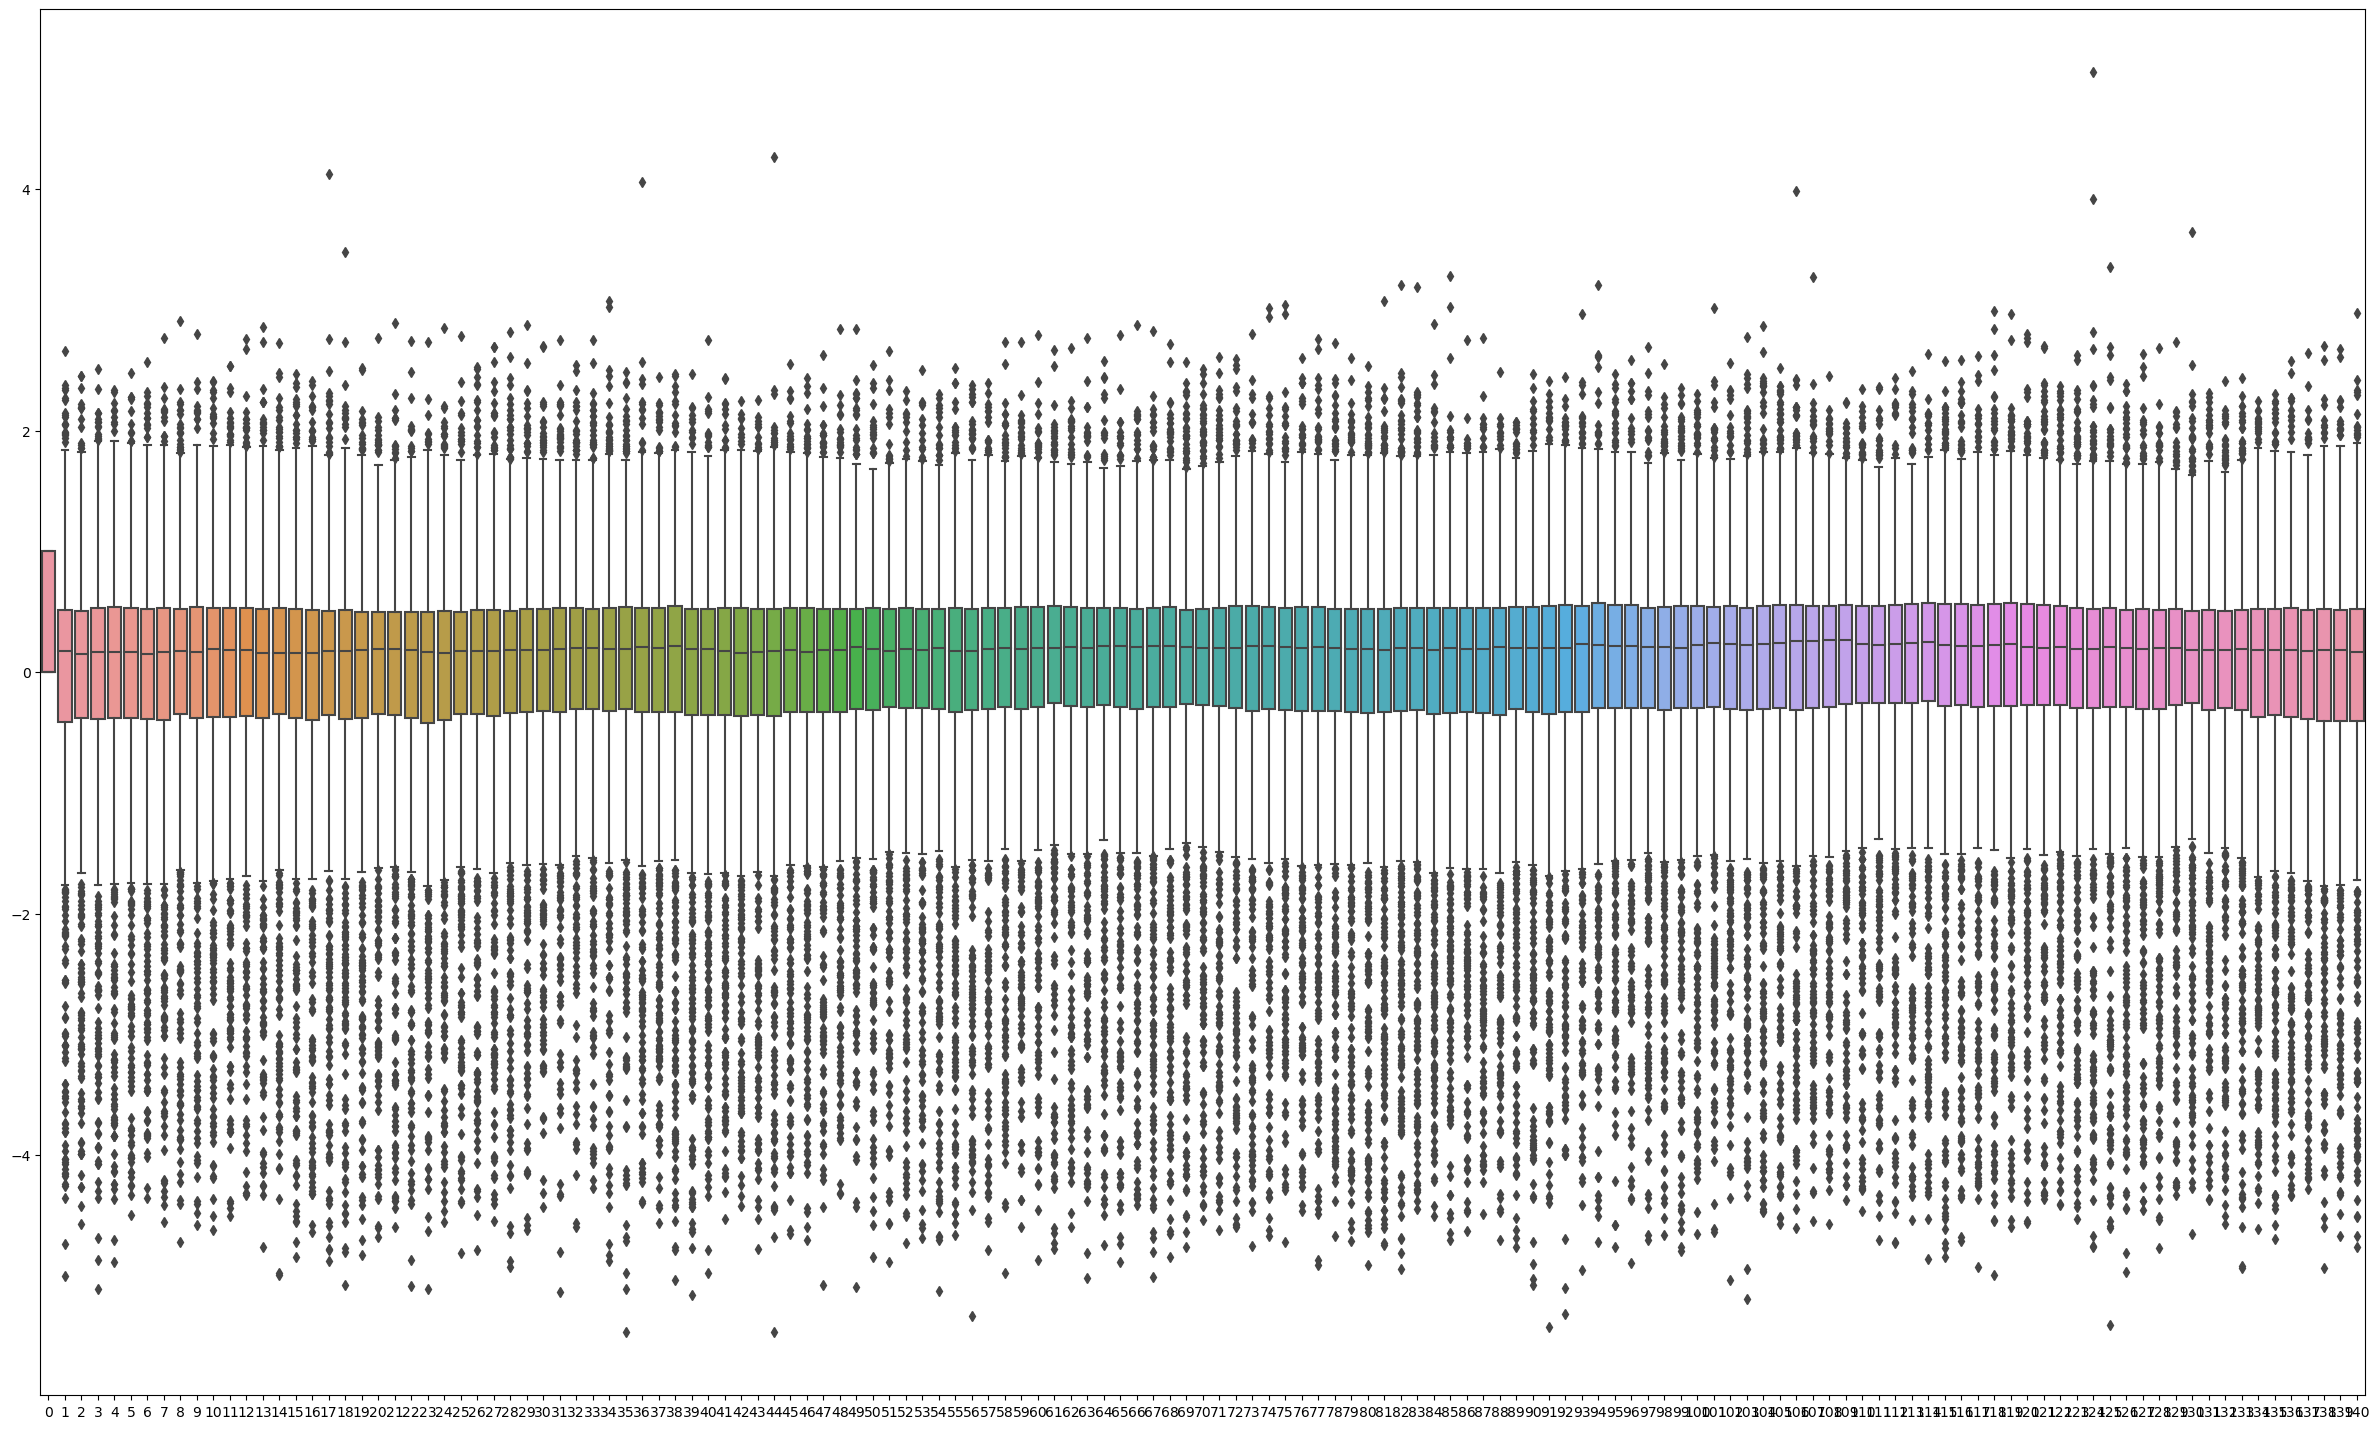

In [275]:
plt.figure(figsize=(30,18))
sns.boxplot(train)

checking is there any null data

In [276]:
train[train.isnull().values==True]

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140


In [277]:
test[test.isnull().values==True]

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140


How many category

In [278]:
train.iloc[:,0].unique()

array([1, 0])

In [279]:
test.iloc[:,0].unique()

array([0, 1])

In [280]:
trainval.shape

(1622, 141)

In [281]:
x_train = train.iloc[:,1:141]
y_train = train.iloc[:,0]

x_validation = validation.iloc[:,1:141]
y_validation = validation.iloc[:,0]

x_trainval = trainval.iloc[:,1:141]
y_trainval = trainval.iloc[:,0]

x_test_real = test.iloc[:,1:141]
y_test_real = test.iloc[:,0]

check is there any repeated data

In [282]:
x_train.duplicated().sum() 

0

In [283]:
x_validation.duplicated().sum()

0

In [284]:
x_trainval.duplicated().sum()

0

In [285]:
x_test_real.duplicated().sum()

0

check data balance

In [286]:
y_train.value_counts()# check if label is balanced

0    630
1    451
Name: 0, dtype: int64

In [287]:
y_validation.value_counts()

0    289
1    252
Name: 0, dtype: int64

In [288]:
y_trainval.value_counts()

0    919
1    703
Name: 0, dtype: int64

In [289]:
y_test_real.value_counts()

0    102
1     78
Name: 0, dtype: int64

standardization

In [290]:
scaler = StandardScaler()
scaler0 = scaler.fit(x_train)
x_train = scaler0.fit_transform(x_train)

scaler1 = scaler.fit(x_train)
x_validation = scaler1.fit_transform(x_validation)

scaler2 = scaler.fit(x_train)
x_trainval = scaler2.fit_transform(x_trainval)

scaler3 = scaler.fit(x_train)
x_test_real = scaler3.fit_transform(x_test_real)

### SVM

In [291]:
for kernel in ['linear', 'poly','rbf', 'sigmoid']:
    clf = SVC(kernel = kernel
             , gamma = 'auto'
             , degree = 1
             , cache_size = 1500 #bigger, allow memory is more
             ).fit(x_train, y_train)
    result = clf.predict(x_validation)#got model predict result
    score = clf.score(x_validation, y_validation)#return accuracy
    recall = recall_score(y_validation, result)
    f1 = f1_score(y_validation, result)
    auc = roc_auc_score(y_validation, clf.decision_function(x_validation))#clf.decision_function(x_validation) is probability，Confidence  
    cm = confusion_matrix(y_validation, result)
    print("%s 's testing accuracy %f, recall is %f, auc is %f, f1 is %f'" %  \
          (kernel, score, recall, auc, f1))
    print('Confusion Matrix:',cm)
    
   

linear 's testing accuracy 0.539741, recall is 0.289683, auc is 0.497336, f1 is 0.369620'
Confusion Matrix: [[219  70]
 [179  73]]
poly 's testing accuracy 0.537893, recall is 0.007937, auc is 0.502554, f1 is 0.015748'
Confusion Matrix: [[289   0]
 [250   2]]
rbf 's testing accuracy 0.981516, recall is 0.984127, auc is 0.996471, f1 is 0.980237'
Confusion Matrix: [[283   6]
 [  4 248]]
sigmoid 's testing accuracy 0.356747, recall is 0.007937, auc is 0.032433, f1 is 0.011364'
Confusion Matrix: [[191  98]
 [250   2]]


confirm kernel function is rbf

In [292]:
for kernel in ['linear', 'poly','rbf', 'sigmoid']:
    clf = SVC(kernel = kernel
             , gamma = 'auto'
             , degree = 1
             , cache_size = 1500 #bigger, allow memory is more
             , class_weight = 'balanced'# because samples a little not balanced
             ).fit(x_train, y_train)
    result = clf.predict(x_validation)#got model predict result
    score = clf.score(x_validation, y_validation)#return accuracy
    recall = recall_score(y_validation, result)
    f1 = f1_score(y_validation, result)
    auc = roc_auc_score(y_validation, clf.decision_function(x_validation))#clf.decision_function(x_validation) is probability，Confidence  
    cm = confusion_matrix(y_validation, result)
    print("%s 's testing accuracy %f, recall is %f, auc is %f, f1 is %f'" %  \
          (kernel, score, recall, auc, f1))
    print('Confusion Matrix:',cm)
    
   

linear 's testing accuracy 0.534196, recall is 0.583333, auc is 0.516079, f1 is 0.538462'
Confusion Matrix: [[142 147]
 [105 147]]
poly 's testing accuracy 0.537893, recall is 0.535714, auc is 0.525691, f1 is 0.519231'
Confusion Matrix: [[156 133]
 [117 135]]
rbf 's testing accuracy 0.981516, recall is 0.984127, auc is 0.996705, f1 is 0.980237'
Confusion Matrix: [[283   6]
 [  4 248]]
sigmoid 's testing accuracy 0.125693, recall is 0.123016, auc is 0.060842, f1 is 0.115888'
Confusion Matrix: [[ 37 252]
 [221  31]]


In [293]:
# print(classification_report(y_validation,result))

### Now, getting the best kernel and choose the class_weight. Next, using trainval data to train again and testing on test dataset

In [294]:
clf = SVC(kernel = 'rbf'
         , gamma = 'auto'
         , degree = 1
         , cache_size = 1500 #bigger, allow memory is more
         , class_weight = 'balanced'# because samples a little not balanced
         , C=1
         , probability = True
         ).fit(x_trainval, y_trainval)
result = clf.predict(x_test_real)#got model predict result
score = clf.score(x_test_real, y_test_real)#return accuracy
recall = recall_score(y_test_real, result)
f1 = f1_score(y_test_real, result)
auc = roc_auc_score(y_test_real, clf.decision_function(x_test_real))#clf.decision_function(x_validation) is probability，Confidence  
cm = confusion_matrix(y_test_real, result)
precision = cm[0,0]/(cm[0,0]+cm[1,0])
fpr = cm[1,0]/cm[1,:].sum()
print('accuracy at test dataset:', accuracy)
print('precision at test dataset:', precision)
print('recall at test dataset:', recall)
print('f1 at test dataset:', f1)
print('auc at test dataset:', auc)



accuracy at test dataset: 0.983358024691358
precision at test dataset: 1.0
recall at test dataset: 1.0
f1 at test dataset: 0.9811320754716981
auc at test dataset: 0.9987430869783811


/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


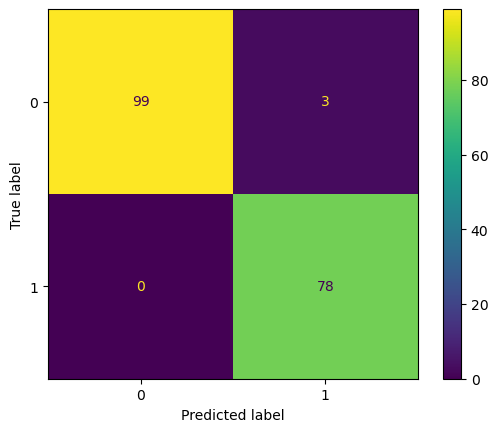

In [305]:
plot_confusion_matrix(clf, x_test_real, y_test_real)

### KNN

First, using training data and validation data 

In [296]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predictions = knn.predict(x_validation)
score = knn.score(x_test_real, y_test_real)
auc = roc_auc_score(y_validation, predictions)
print(classification_report(y_validation, predictions))
print('auc', auc)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       289
           1       0.96      0.98      0.97       252

    accuracy                           0.97       541
   macro avg       0.97      0.97      0.97       541
weighted avg       0.97      0.97      0.97       541

auc 0.9725243038391828


/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

Second, using trainval data set to train and using test dataset to validate

In [297]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_trainval, y_trainval)
predictions = knn.predict(x_test_real)
auc = roc_auc_score(y_test_real, predictions)
print(classification_report(y_test_real, predictions))
print('auc', auc)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.99      0.99      0.99        78

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180

auc 0.9886877828054299


/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


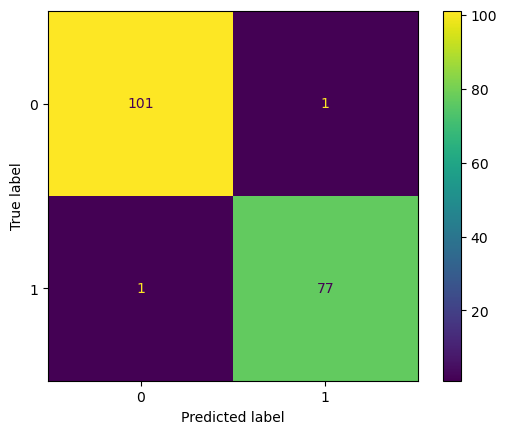

In [298]:
plot_confusion_matrix(knn, x_test_real, y_test_real)

### NB
First, using training data and validation data

In [299]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
predictions = gaussian.predict(x_validation)
auc = roc_auc_score(y_validation, predictions)
print(classification_report(y_validation, predictions))
print('auc', auc)

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       289
           1       0.45      0.42      0.43       252

    accuracy                           0.49       541
   macro avg       0.49      0.49      0.49       541
weighted avg       0.49      0.49      0.49       541

auc 0.4868800461361015


Second, using trainval data set to train and using test dataset to validate

In [300]:
gaussian.fit(x_trainval, y_trainval)
predictions = gaussian.predict(x_test_real)
auc = roc_auc_score(y_test_real, predictions)
print(classification_report(y_test_real, predictions))
print('auc', auc)

              precision    recall  f1-score   support

           0       0.55      0.54      0.54       102
           1       0.41      0.42      0.42        78

    accuracy                           0.49       180
   macro avg       0.48      0.48      0.48       180
weighted avg       0.49      0.49      0.49       180

auc 0.4811463046757165


/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


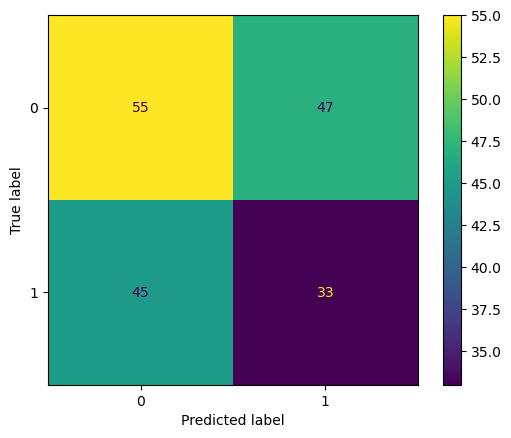

In [301]:
plot_confusion_matrix(gaussian, x_test_real, y_test_real)

### random forest 
First, using training data and validation data

In [302]:
random_forest = GridSearchCV(estimator=RandomForestClassifier()
                             , param_grid={'n_estimators': [100, 300]}, cv=10).fit(x_train, y_train)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_validation)
auc = roc_auc_score(y_validation, predictions)
print(classification_report(y_validation, predictions))
print('auc', auc)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       289
           1       0.97      0.95      0.96       252

    accuracy                           0.96       541
   macro avg       0.96      0.96      0.96       541
weighted avg       0.96      0.96      0.96       541

auc 0.9603655187565223


In [303]:
random_forest.fit(x_trainval, y_trainval)
predictions = random_forest.predict(x_test_real)
auc = roc_auc_score(y_test_real, predictions)
print(classification_report(y_test_real, predictions))
print('auc', auc)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.96      0.98        78

    accuracy                           0.98       180
   macro avg       0.99      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

auc 0.9807692307692308


/Users/liuyiyan/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


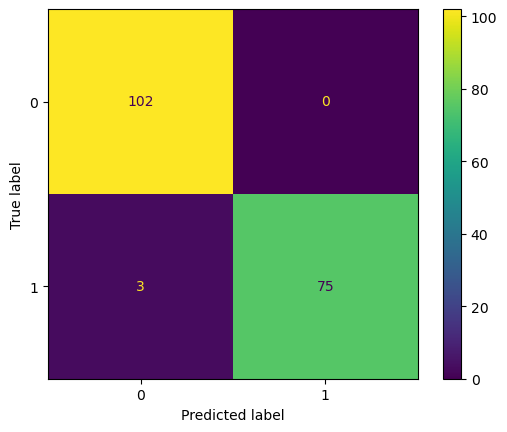

In [304]:
plot_confusion_matrix(random_forest, x_test_real, y_test_real)